# Predicting Result Whether to Play Tennis or Not using Decision Tree Classifier

<h2>Importing Required Libraries</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import(
accuracy_score,
precision_score,
recall_score,
f1_score,
classification_report
)

<h2>Loading Dataset into Pandas DataFrame</h2>

In [3]:
tennis = pd.read_csv(r"C:\Users\ad min\Desktop\ML\ml\Final\playtennis.csv")

<h2>Displaying Shape of the Data</h2>

In [4]:
print("No. of Rows:",tennis.shape[0])
print("No. of Columns:",tennis.shape[1])

No. of Rows: 14
No. of Columns: 5


<h2>Displaying List of the Columns</h2>

In [5]:
print("List of Columns".center(50,"-"))
for col in tennis.columns:
    print(col)

-----------------List of Columns------------------
OUTLOOK
TEMPERATURE
HUMIDITY
WINDY
PLAYTENNIS


<h2>Fetching First 5 Sample Records</h2>

In [6]:
tennis.head()

OUTLOOK TEMPERATURE HUMIDITY  WINDY PLAYTENNIS
0     SUNNY         HOT     HIGH  False         NO
1     SUNNY         HOT     HIGH   True         NO
2  OVERCAST         HOT     HIGH  False        YES
3     RAINY        MILD     HIGH  False        YES
4     RAINY        COOL   NORMAL  False        YES

<h2>Fetching Last 5 Sample Records</h2>

In [186]:
tennis.tail()

OUTLOOK TEMPERATURE HUMIDITY  WINDY PLAYTENNIS
9      RAINY        MILD   NORMAL  False        YES
10     SUNNY        MILD   NORMAL   True        YES
11  OVERCAST        MILD     HIGH   True        YES
12  OVERCAST         HOT   NORMAL  False        YES
13     RAINY        MILD     HIGH   True         NO

<h2>Summerized Information</h2>

In [187]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OUTLOOK      14 non-null     object
 1   TEMPERATURE  14 non-null     object
 2   HUMIDITY     14 non-null     object
 3   WINDY        14 non-null     bool  
 4   PLAYTENNIS   14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


<h2>Description of the Dataset (Summerized)</h2>

In [188]:
tennis.describe()

OUTLOOK TEMPERATURE HUMIDITY  WINDY PLAYTENNIS
count       14          14       14     14         14
unique       3           3        2      2          2
top      SUNNY        MILD     HIGH  False        YES
freq         5           6        7      8          9

<h2>Handling Missing Values</h2>

In [189]:
tennis.isnull().sum()

OUTLOOK        0
TEMPERATURE    0
HUMIDITY       0
WINDY          0
PLAYTENNIS     0
dtype: int64

<h4 style="color:green;">No Null or Missing Values Found</h4>

<h2>Handling Duplicate Values</h2>

In [190]:
tennis.duplicated().sum()

0

<h4 style="color:green;">No Duplicate Values Found</h4>

<h2>Encoding Nominal Data into Ordinal Data</h2>

In [7]:
le = LabelEncoder()
for col in tennis.columns:
    tennis[col] = le.fit_transform(tennis[col])

<h2>Splitting Data into Indepedent and Dependent sets</h2>

In [8]:
x = pd.DataFrame(tennis.iloc[:,0:4])
y = pd.DataFrame(tennis.iloc[:,4])

<h2>Splitting Data into Training and Testing Sets</h2>

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

<h2>Creating a Model</h2>

In [10]:
tree_cls = DecisionTreeClassifier(criterion='entropy')

<h2>Training a Model</h2>

In [11]:
tree_cls.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

<h2>Predicting the Output</h2>

In [12]:
ypred = tree_cls.predict(xtest)
ypred

array([0, 1, 1, 1])

<h2>Evaluating Models Perfomance</h2>

In [13]:
accuracy_score(ytest,ypred)

1.0

In [14]:
precision_score(ytest,ypred,average="macro")

1.0

In [15]:
recall_score(ytest,ypred,average="macro")

1.0

In [16]:
f1_score(ytest,ypred,average="macro")

1.0

In [17]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



<h2>Constructing Decision Tree based on the Predictions</h2>

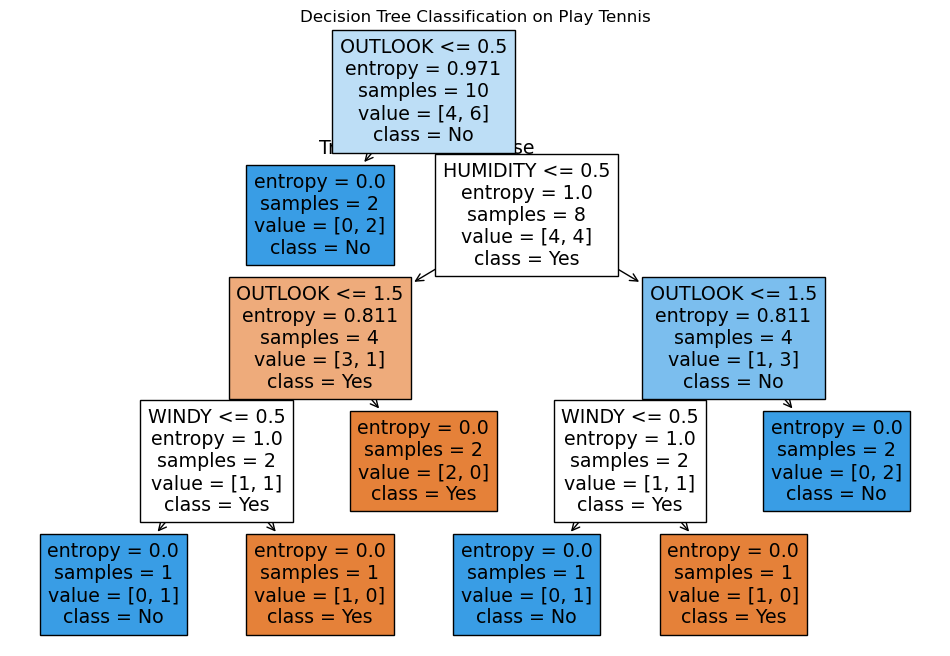

In [18]:
plt.figure(figsize=(12,8))
plot_tree(tree_cls,feature_names=x.columns,class_names=["Yes","No"],label='all',
    filled=True)
plt.title("Decision Tree Classification on Play Tennis")
plt.show()